In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#######################
__version__ = "1.0"
__date__ = "2016-06-19"
__modified_by__ = "Hrushikesh Dhumal"
####################################

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import nltk
import utils
from utils import *
#for plots to be in ipython notebook
%matplotlib inline 
# pd.options.display.mpl_style = 'default'

pd.set_option('display.max_columns', 36)
print "Pandas version: " + pd.__version__

Pandas version: 0.17.0


In [7]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
print "Plotly version: "+ plotly.__version__
plotly.offline.init_notebook_mode()

Plotly version: 1.12.1


In [8]:
read_filename = os.path.join(utils.YELP_DATA_CSV_DIR, 'business_review_user'+ utils.data_subset + '.csv')
df_data = pd.read_csv(read_filename, engine='c', encoding='utf-8')

In [9]:
df_data.shape

(2193, 30)

In [10]:
N_star_categories = 5
colors = np.array(['#660000', '#ff4d4d', '#ffb3b3', '#99e699', '#29a329']) # 1, 2, 3, 4, and 5 stars respectively

In [11]:
#stars_labels = np.array([x_stars+1 for x_stars in range(N_star_categories)])
stars_labels = np.array(range(N_star_categories)) + 1;
#star_category_dist_fig = plt.figure(figsize=(12,8))
bar_plot_indices = np.arange(N_star_categories) 
star_category_absolute_frequencies = df_data.review_stars.value_counts(ascending=True);
star_category_relative_frequencies = np.array(star_category_absolute_frequencies)/float(sum(star_category_absolute_frequencies))

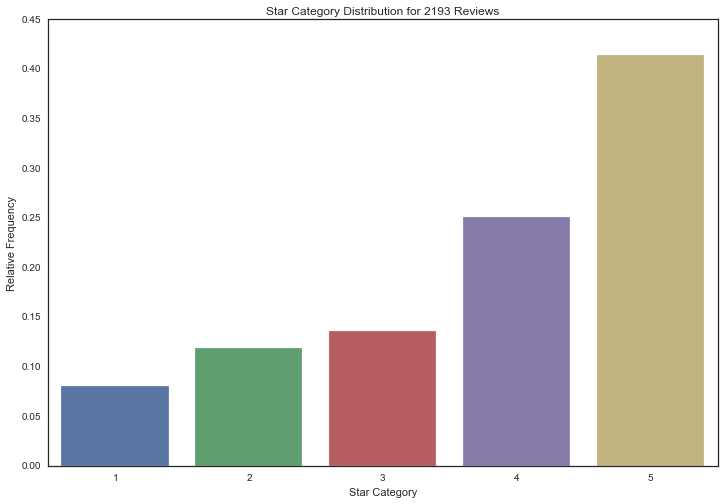

In [12]:
# Seaborn example
sns.set()
sns.set(style="white")
fig2 = plt.figure(figsize=(12, 8))
ax = sns.barplot(x=bar_plot_indices + 1, y=star_category_relative_frequencies)
ax.set_xlabel('Star Category');
ax.set_ylabel('Relative Frequency');
ax.set_title('Star Category Distribution for {0} Reviews'.format(len(df_data)));

In [13]:
# Plotly example
plotly.offline.iplot_mpl(fig2)

In [14]:
from wordcloud import WordCloud

In [15]:
def plot_word_cloud(data):
    # take relative word frequencies into account, lower max_font_size
    wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(str(data))
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

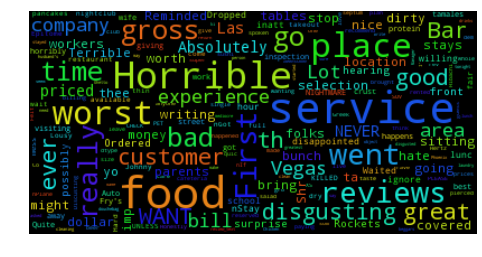

In [16]:
plot_word_cloud(df_data["review_text"].loc[df_data.review_stars == 1, ])

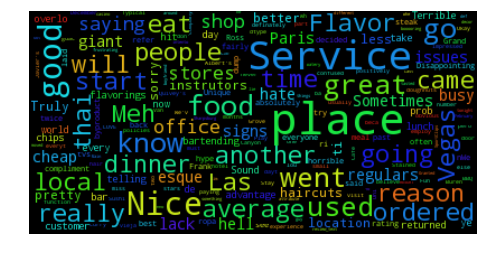

In [17]:
plot_word_cloud(df_data["review_text"].loc[df_data.review_stars == 2, ])

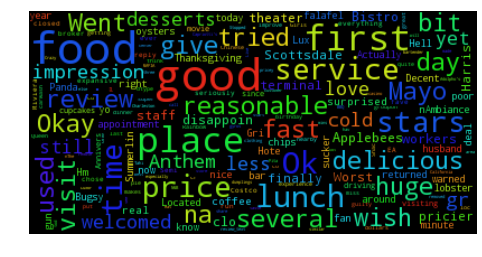

In [18]:
plot_word_cloud(df_data["review_text"].loc[df_data.review_stars == 3, ])

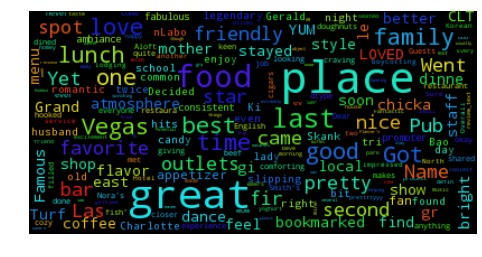

In [19]:
plot_word_cloud(df_data["review_text"].loc[df_data.review_stars == 4, ])

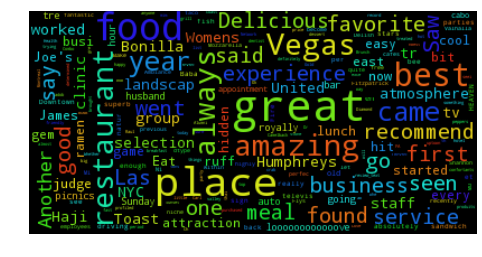

In [20]:
plot_word_cloud(df_data["review_text"].loc[df_data.review_stars == 5, ])

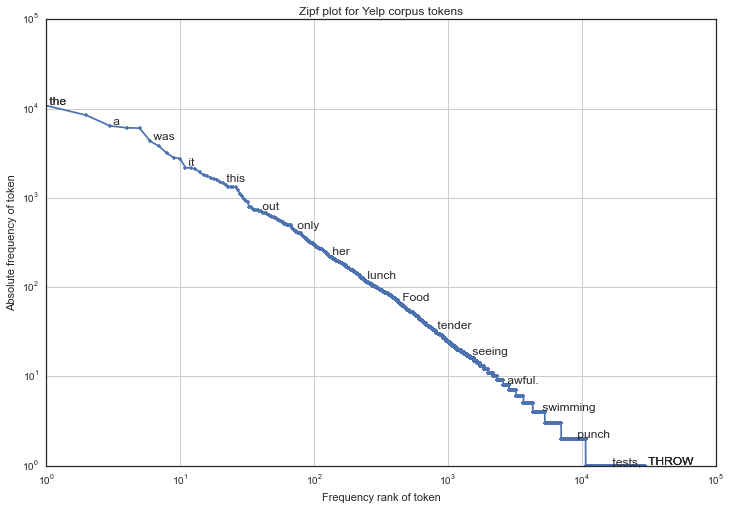

In [25]:
yelp_review_tokens = df_data.review_text.sum()
yelp_review_vocabulary = nltk.FreqDist(yelp_review_tokens.split())
yelp_review_vocabulary_counts = np.array(yelp_review_vocabulary.values())
yelp_review_vocabulary_tokens = yelp_review_vocabulary.keys()

# A Zipf plot
ranks = np.arange(1, len(yelp_review_vocabulary_counts)+1)
indices = np.argsort(-yelp_review_vocabulary_counts)
frequencies = yelp_review_vocabulary_counts[indices]
fig3 = plt.figure(figsize=(12, 8))
plt.loglog(ranks, frequencies, marker=".")
plt.title("Zipf plot for Yelp corpus tokens")
plt.xlabel("Frequency rank of token")
plt.ylabel("Absolute frequency of token")
plt.grid(True)
for n in list(np.logspace(-0.5, np.log10(len(yelp_review_vocabulary_counts)), 20).astype(int)):
    dummy = plt.text(ranks[n-1], frequencies[n-1], " " + yelp_review_vocabulary_tokens[indices[n-1]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

# show()

In [27]:
plotly.offline.iplot_mpl(fig3)

<b> I see that Yelp data is also following the Zipfs law and giving straight line, indicating tfidf vectorizer can be used for better performance for finding the cut offs </b>

In [30]:
tokens_sorted =  []
i =0;
for tok in yelp_review_vocabulary_tokens:
    tokens_sorted.append(yelp_review_vocabulary_tokens[indices[i]])
    i = i + 1

In [43]:
# Interactive plot for frequency VS rank
trace0 = go.Scatter(
    x = ranks,
    y = frequencies,
    text = tokens_sorted,
    mode='markers',
    marker=dict(size=4,
                line=dict(width=1)
               )
)

# Code for loglog plot
# layout = go.Layout(
#     title='Zipf`s plot for Yelp corpus',
#     hovermode='closest',
#     xaxis=dict(
#         title='Frequency rank of token',
#         type='log',
#         autorange=True
#     ),
#     yaxis=dict(
#         title='Absolute frequency of token',
#         type='log',
#         autorange=True
#     )
# )

layout = go.Layout(
    title='Frequency vs Rank for a sample of yelp review dataset',
    hovermode='closest',
    xaxis=dict(
        title='Rank of words',
        ticklen=5,
        zeroline=False,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Frequency of word',
        ticklen=5,
        gridwidth=2,
    ),
)
fig4 = go.Figure(data=[trace0], layout=layout)
plotly.offline.iplot(fig4)
# py.iplot(fig, filename='Yelp word frequency vs rank')

# EXPERIMENTS

In [56]:
def plot_tfidf(vocabulary):
    vocabulary_counts = np.array(vocabulary.values())
    vocabulary_tokens = vocabulary.keys()

    # A Zipf plot
    ranks = np.arange(1, len(vocabulary_counts)+1)
    indices = np.argsort(-vocabulary_counts)
    frequencies = vocabulary_counts[indices]
    plt.loglog(ranks, frequencies, marker=".")
    plt.title("Zipf plot for Yelp corpus tokens")
    plt.xlabel("Frequency rank of token")
    plt.ylabel("Absolute frequency of token")
    plt.grid(True)
    for n in list(np.logspace(-0.5, np.log10(len(vocabulary_counts)), 20).astype(int)):
        dummy = plt.text(ranks[n-1], frequencies[n-1], " " + vocabulary_tokens[indices[n-1]], 
                     verticalalignment="bottom",
                     horizontalalignment="left")

plot_tfidf(vectorizer_tfidf.vocabulary_)

AttributeError: 'numpy.float64' object has no attribute '_mask'

In [53]:
vectorizer_count = CountVectorizer(analyzer = "word",
                                 tokenizer = None,
                                 preprocessor = None,
                                 ngram_range = (1, 1),
                                 strip_accents = 'unicode',
                                 stop_words = None,
                                 #max_features = 1000
                                  )
feature_matrix_count = vectorizer_count.fit_transform(df_data.review_text)

In [27]:
#print vectorizer.vocabulary_

In [55]:
vectorizer_tfidf = TfidfVectorizer(sublinear_tf=False, 
#                                   min_df=0.1,
#                                   max_df=0.5,
#                                   stop_words='english', 
#                                   max_features = 1000
                                  )

feature_matrix_tfidf = vectorizer_tfidf.fit_transform(df_data.review_text)

In [26]:
print feature_matrix_count.shape
print feature_matrix_tfidf.shape
#print vectorizer_tfidf.vocabulary_

(2193, 13519)
(2193, 13550)


In [28]:
#print vectorizer_count.vocabulary_
idf = vectorizer_tfidf.idf_
print dict(zip(vectorizer_tfidf.get_feature_names(), idf))

{u'stock': 6.4962570634989563, u'raining': 7.5948693521670663, u'yellow': 7.0840437284010749, u'phoenominal': 8.00033446027523, u'four': 5.0046021867212396, u'prices': 3.6183078256013488, u'woods': 6.9017221716071209, u'hanging': 6.3908965478411295, u'schnucks': 8.00033446027523, u'accueilli': 8.00033446027523, u'otro': 8.00033446027523, u'looking': 3.6762018040202511, u'lors': 8.00033446027523, u'lord': 7.5948693521670663, u'immature': 8.00033446027523, u'callender': 8.00033446027523, u'meadows': 8.00033446027523, u'porron': 8.00033446027523, u'swivel': 7.5948693521670663, u'deli': 6.3908965478411295, u'sgrimp': 8.00033446027523, u'massaman': 8.00033446027523, u'eggrolls': 7.5948693521670663, u'buche': 8.00033446027523, u'crackin': 8.00033446027523, u'figs': 8.00033446027523, u'taj': 8.00033446027523, u'bringing': 6.6140400991553392, u'undercharged': 8.00033446027523, u'disturb': 7.5948693521670663, u'basics': 7.5948693521670663, u'prize': 7.5948693521670663, u'broiler': 8.00033446027

In [29]:
feature_matrix_tfidf.toarray()[feature_matrix_tfidf.indices, ]

IndexError: index 12271 is out of bounds for axis 0 with size 2193

In [30]:
from __future__ import division
t = sum(vectorizer_tfidf.vocabulary_.values())
for val in vectorizer_tfidf.vocabulary_.values():
    print ("%0.5f" % (val / t))
    #print type(val)

0.00010
0.00015
0.00010
0.00005
0.00010
0.00015
0.00006
0.00011
0.00001
0.00000
0.00009
0.00007
0.00014
0.00014
0.00008
0.00007
0.00002
0.00008
0.00010
0.00013
0.00004
0.00004
0.00008
0.00004
0.00002
0.00013
0.00005
0.00013
0.00002
0.00004
0.00001
0.00010
0.00002
0.00015
0.00003
0.00014
0.00001
0.00012
0.00004
0.00012
0.00013
0.00003
0.00012
0.00013
0.00003
0.00008
0.00001
0.00010
0.00013
0.00004
0.00011
0.00013
0.00012
0.00002
0.00011
0.00013
0.00003
0.00005
0.00009
0.00012
0.00004
0.00003
0.00000
0.00012
0.00007
0.00006
0.00006
0.00007
0.00007
0.00006
0.00008
0.00003
0.00014
0.00013
0.00007
0.00008
0.00004
0.00003
0.00014
0.00000
0.00008
0.00012
0.00009
0.00006
0.00008
0.00014
0.00011
0.00005
0.00000
0.00011
0.00002
0.00002
0.00001
0.00008
0.00012
0.00011
0.00001
0.00014
0.00012
0.00003
0.00012
0.00008
0.00002
0.00007
0.00000
0.00013
0.00009
0.00013
0.00009
0.00014
0.00010
0.00009
0.00006
0.00011
0.00013
0.00002
0.00007
0.00000
0.00006
0.00013
0.00000
0.00006
0.00006
0.00000
0.00000
